In [1]:
import sys
import os
import torch
from torch.utils.data import DataLoader
import torch.nn.functional as F
from IPython.display import display, HTML
from collections import defaultdict
sys.path.append(os.path.abspath(os.path.join(os.path.dirname("__file__"), '..')))
from datasets.Waymo import WaymoDataset, waymo_collate_fn
from model import OccupancyFlowNetwork
from visualize import render_observed_scene_state, render_ground_truth_occupancy

In [2]:
NUM_SCENES = 1#16#25
MAX_SCENES_TO_RENDER = 1

tfrecord_path = '../../data1/waymo_dataset/v1.1/waymo_open_dataset_motion_v_1_1_0/uncompressed/tf_example/validation'
idx_path = '../../data1/waymo_dataset/v1.1/idx/validation'
dataset = WaymoDataset(tfrecord_path, idx_path)
dataloader = DataLoader(dataset, batch_size=NUM_SCENES, collate_fn=waymo_collate_fn)

road_map, agent_trajectories, \
flow_field_agent_ids, flow_field_positions, flow_field_times, flow_field_velocities, \
occupancy_grid_positions, occupancy_grid_times, occupancy_grid_occupancies, occupancy_grid_occluded_occupancies, \
agent_mask, flow_field_mask =  next(iter(dataloader))

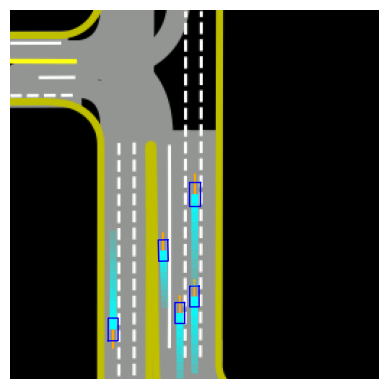

In [3]:
render_observed_scene_state(road_map[0], agent_trajectories[0])

In [4]:
anim = render_ground_truth_occupancy(road_map[0], occupancy_grid_occupancies[0])
display(HTML(anim.to_jshtml()))

In [5]:
anim = render_ground_truth_occupancy(road_map[0], occupancy_grid_occluded_occupancies[0], occluded=True)
display(HTML(anim.to_jshtml()))